In [61]:
import pandas as pd
import numpy as np  

#Data read

In [62]:
train_x = np.load('data/train_x.npy')
test_x = np.load('data/test_x.npy')
val_x = np.load('data/valid_x.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
val_y = np.load('data/valid_y.npy')

In [63]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

In [64]:
import matplotlib.pyplot as plt

# Load numpy array from file
img = train_x[0]
img = image_normalization(img)
img = img.transpose(1, 2, 0) 

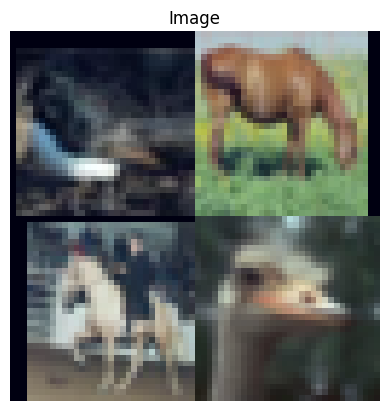

1


In [65]:
# Plot image
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[0])

In [26]:
train_x.shape

(45000, 3, 64, 64)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(4, activation='softmax'))  # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)       

In [58]:
X_train = train_x.transpose((0, 2, 3, 1))

In [59]:
y_train_encoded = to_categorical(train_y, num_classes=4)

In [60]:
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1125/1125 [==============================] - 116s 102ms/step - loss: 1.3885 - accuracy: 0.2511 - val_loss: 1.3865 - val_accuracy: 0.2521
Epoch 2/10
  18/1125 [..............................] - ETA: 1:44 - loss: 1.3865 - accuracy: 0.2569

KeyboardInterrupt: 